# analysis of bombings in specific areas THOR data

* https://umap.openstreetmap.fr/en/map/ho-chi-minh-trail_183880#7/18.062/106.370

In [1]:
import os, io, random
import string
import numpy as np
import pandas as pd
import pylab as plt
import seaborn as sns
from collections import OrderedDict
import datetime as dt
import geopandas as gpd
import contextily as cx
from contextily.tile import warp_img_transform, warp_tiles, _warper

In [2]:
borders= gpd.read_file('SE_ASIA_PROVINCES_SV_NV_KH_LA.shp')
laosmap=borders[borders.COUNTRY=='LA']

In [3]:
#load pickle saved from analysis notebook
s = pd.read_pickle('thor_small.pkl')

## convert to geodataframe

In [18]:
gdf=gpd.GeoDataFrame(s, geometry=gpd.points_from_xy(s.TGTLONDDD_DDD_WGS84, s.TGTLATDD_DDD_WGS84),crs="EPSG:4326").dropna()

## plot a region

In [ ]:
lat = 105.762962
lon = 17.673904
x1,x2 = 100,110
y1,y2 = 13,23

def area_plot(gdf, xlim, ylim, ax):
    
    borders.plot(color='none',alpha=.2,lw=.5,ec='black',ax=ax)    
    gdf.plot(color='red',markersize=2,alpha=.4,ax=ax) #column='WEAPONTYPE
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    cx.add_basemap(ax,crs=gdf.crs)
    return

#f,ax=plt.subplots(1,1,figsize=(6,6))
#area_plot(gdf[:1000], (100,110), (13,23), ax)

## load pre-defined areas from a shapefile of polygons

 * we can define polygons externally e.g. in qgis using a shapefile layer

(15.0, 20.0)

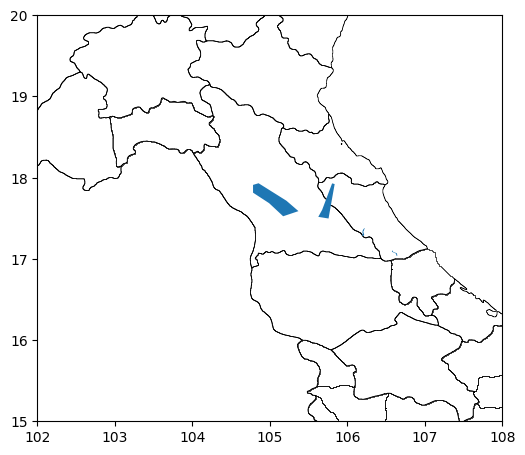

In [88]:
regions=gpd.read_file('polygons.shp')
f,ax=plt.subplots(1,1,figsize=(6,6))
borders.plot(color='none',lw=.5,ax=ax)
regions.plot(ax=ax)
ax.set_xlim(102,108)
ax.set_ylim(15,20)

## quantify bombings over time in each area

105.74420533883557 17.672781169920068
105.0538209971554 17.720895924461
106.20421333925906 17.323080884764725
106.6140504025003 17.06850803114759


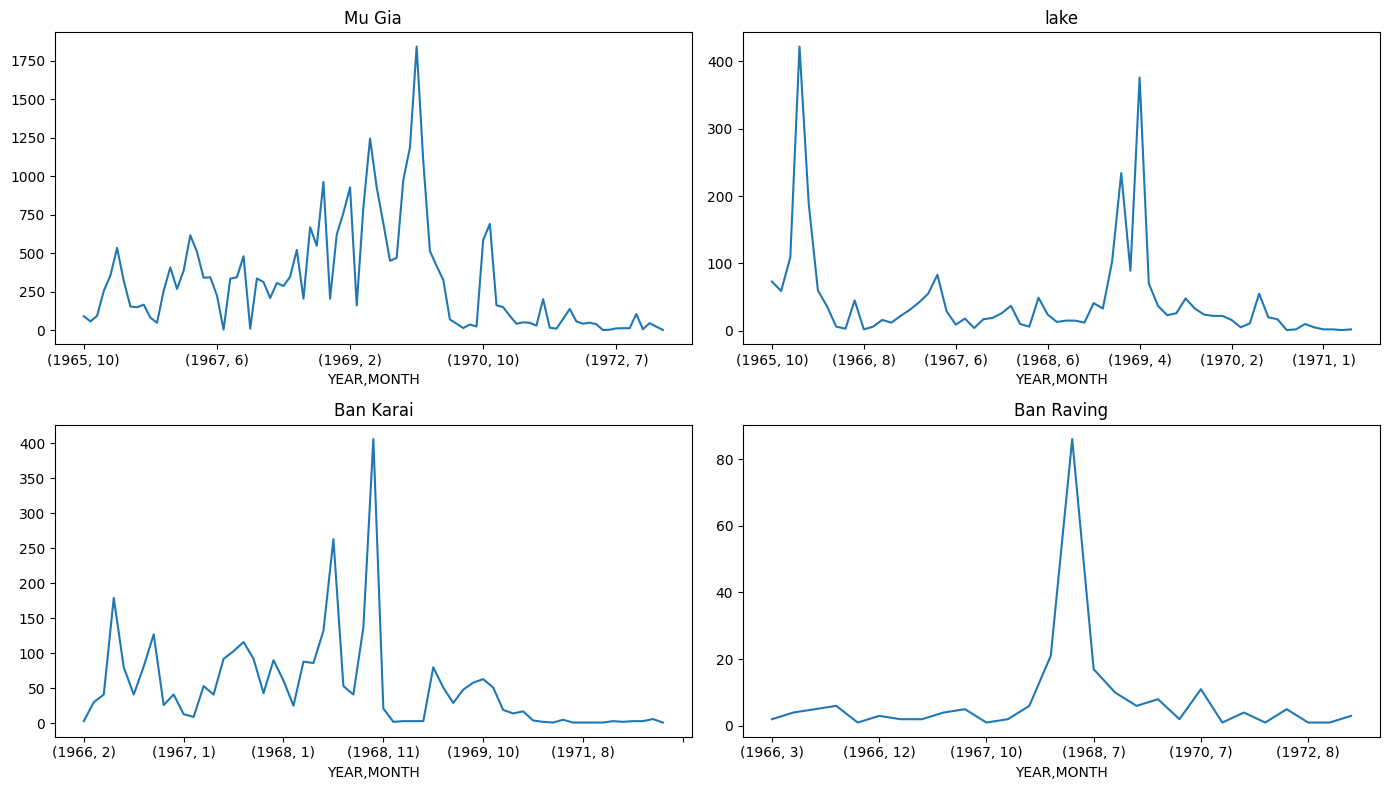

In [82]:
f,ax=plt.subplots(2,2,figsize=(14,8))
axs=ax.flat
i=0

#iterate over the polygons
for i,row in regions.iterrows():
    ax=axs[i]
    poly = row.geometry
    #get all the rows within the polygon
    idx = gdf.within(poly)
    #create a new geoDataFrame that will have only the intersecting records
    poly_gdf = gdf.loc[idx].copy()
    lat,lon = poly.centroid.x,poly.centroid.y
    print (lat,lon)
    sy = poly_gdf.groupby(['YEAR','MONTH']).size()
    #smoothed = sy.rolling(10).mean()
    sy.plot(ax=ax)    
    ax.set_title(row['name'])
    i+=1
plt.tight_layout()

In [ ]:
f,ax=plt.subplots(2,4,figsize=(20,10))
axs=ax.flat
i=0

for y in range(1965,1973):
    ax=axs[i]
    sub = poly_gdf[poly_gdf.YEAR==y]
    if len(sub)==0:
        continue    
    area_plot(sub, (lat-1,lat+1), (lon-1,lon+1), ax=ax)
    ax.set_title(y)
    ax.axis('off')
    i+=1    